Osnabrück University - Machine Learning (Summer Term 2021) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Axel Schaffland

# Exercise Sheet 05: Dimension Reduction

## Introduction

This week's sheet should be solved and handed in before the end of **Tuesday, May 25, 2021**. If you need help (and Google and other resources were not enough), feel free to contact your groups designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

## Assignment 0: Math recap (Derivatives in higher dimensions) [0 Points]

This exercise is supposed to be very easy but in this and the following sheets we will give points. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is a partial derivative? What is a directional derivative? How are these computed?

YOUR ANSWER HERE

**b)** What is the gradient, the Jacobian matrix, and the Hessian matrix? How are they computed?

YOUR ANSWER HERE

**c)** What is the chain rule (in calculus)? How does it look in the higher-dimensional case?

YOUR ANSWER HERE

## Assignment 1: Curse of Dimensionality [5 Points]

For the following exercise, be detailed in your answers and provide some examples. Think about keywords like: random vectors in high dimensional space, manifolds and Bertillonage.

**a)** What are the curse of dimensionality and its implication for pattern classification?

YOUR ANSWER HERE

**b)** Explain how this phenomenom could be used to one's advantage.

YOUR ANSWER HERE

**c)** Explain in your own words the concepts of descriptive and intrinsic dimensionality.

YOUR ANSWER HERE

**d)** The $n$-dimensional unit cube: A cube with edge length $d=1$ in the $n$-dimensional space $\mathbb{R}^n$. Compute the volume and the length of the diagonal for $n = 1, 2, 3, 4, 5, 10, 100, 1000$. Do the same for $d=\frac{1}{2}$. Discuss the result.

In [2]:
import numpy as np

a = np.array([1, 2, 3, 4, 5, 10, 100, 1000])

In [3]:
print(np.sqrt(a))

[ 1.          1.41421356  1.73205081  2.          2.23606798  3.16227766
 10.         31.6227766 ]


volume Always  1.
length of the diagonal:
$\sqrt{n}*d$:

n | diag 
---|---
1| 1.
2|           1.41
3| 1.73
4 | 2.   
5|        2.23
10| 3.16
100|  10.         
1000| 31.62




**e)** The $n$-dimensional unit ball: A ball with radius $r=1$ in the $n$-dimensional space $\mathbb{R}^n$. Compute the volume for $n = 1,2,3,5,10,100,300,400$. Use the following formula to compute the volume $V$ for a given dimension $n$ and radius $R$:

$$ V_{n}(R)\sim {\frac {1}{\sqrt {n\pi }}}\left({\frac {2\pi e}{n}}\right)^{\frac {n}{2}}R^{n}$$

Refer to https://en.wikipedia.org/wiki/Volume_of_an_n-ball for more details.

Consider a $n$-dimensional unit orange consisting of the peel and the pulp: Let the thickness of the peel be $1\%$ of the radius. Compute the volume of the peel and compare to the volume of the whole orange for the same values of $n$. State the implications of your observations.

In [4]:
# YOUR CODE HERE

YOUR ANSWER HERE

## Assignment 2: Implement and Apply PCA [8 Points]

In this assignment you will implement PCA from the ground up and apply it to the `cars` dataset (simplified from the JSE [2004 New Car and Truck Data](http://www.amstat.org/publications/jse/jse_data_archive.htm)). This dataset consists of measurements taken on 97 different cars. The eleven features measured are: Suggested retail price (USD), Price to dealer (USD), Engine size (liters), Number of engine cylinders, Engine horsepower, City gas mileage, Highway gas mileage, Weight (pounds), Wheelbase (inches), Length (inches) and Width (inches).

We would like to visualize these high dimensional features to get a feeling for how the cars relate to each other so we need to find a subspace of dimension two or three into which we can project the data.

In [5]:
import numpy as np
import pandas as pd
cars=np.loadtxt('cars.csv', delimiter=',')
# TODO: Load the cars dataset in cars.csv .


assert cars.shape == (97, 11), "Shape is not (97, 11), was {}".format(cars.shape)

Excecute the following code which will create a scatter plot matrix (it might take some time to execute). This should give you an idea about trends and correlations in the dataset.

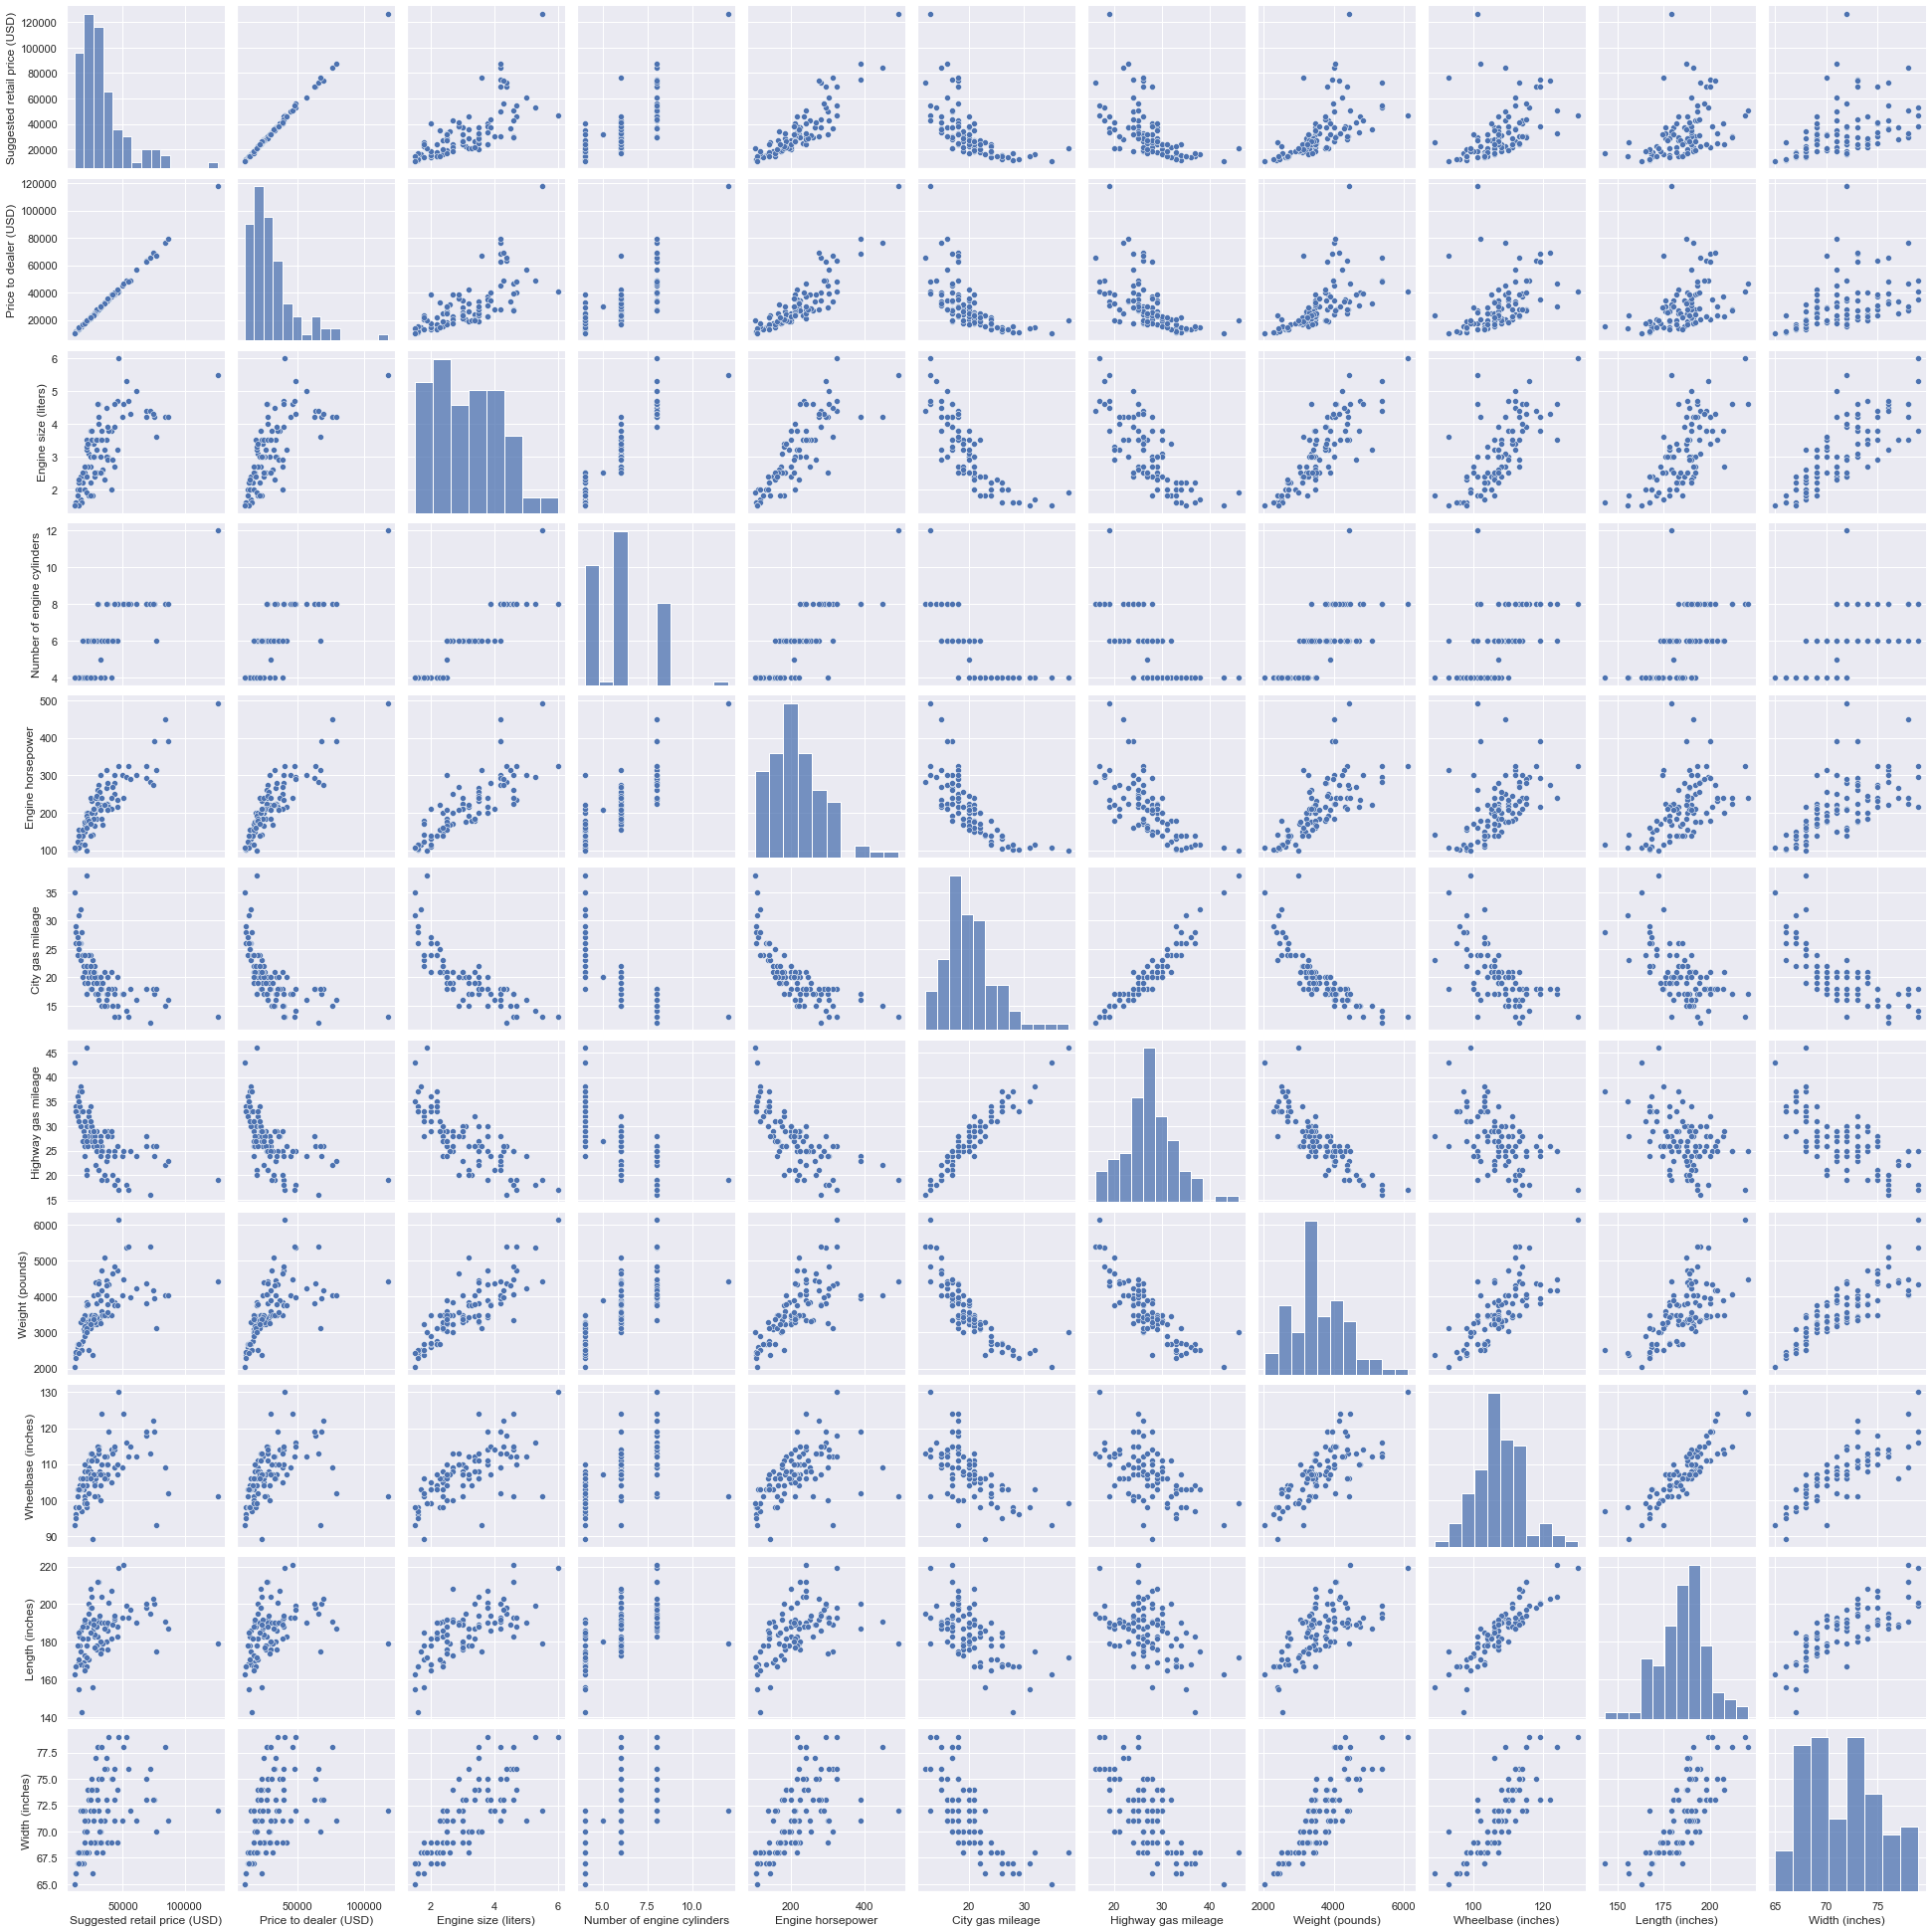

In [6]:
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set()
cols = ['Suggested retail price (USD)', 'Price to dealer (USD)',
          'Engine size (liters)', 'Number of engine cylinders',
          'Engine horsepower', 'City gas mileage' ,
          'Highway gas mileage', 'Weight (pounds)',
          'Wheelbase (inches)', 'Length (inches)', 'Width (inches)']

df = pd.DataFrame(cars, columns=cols)
sns.pairplot(df)

What is the covariance matrix of a dataset? What do the different entries of the matrix mean?

It represents the variance for each features with each features, so we can see, if there is a relation between different features.

YOUR ANSWER HERE

PCA finds a subspace that maximizes the variance by determining the eigenvectors of the covariance matrix. So we need to calculate the covariance matrix and afterwards the eigenvalues. When the data is normalized the covariance is calculated as

$$C = \frac{1}{n-1}((\bf{X}-\bar{x})^T(\bf{X}-\bar{x})) $$

with $X$ being an $n \times d$ matrix with $n$ samples and $d$ features, when $\bar{X}$ is the mean vector of features
$$\bar{X} = \frac{1}{n}\sum_{i=1}^{n}x_i.$$  

The entry $c_{i,j}$ in $C$ (a $d\times d$ matrix) tells you how much feature $i$ correlates with feature $j$.


**Note**: When the features have different scales, for achieving comparable covariance values, **first and before calculating the covariance matrix**, we need to standardize $X$ respecting its features

$${\bf{X}}_{norm} = \frac{\bf{X}}{\sigma}$$

when $\sigma$ is the standard deviation vector of features.

In [7]:
# TODO: Compute the covariance matrix and store it into covar



X = df

#X = X @ np.linalg.cholesky([[1, 0.6], [0.6, 0.6]])

X -= X.mean()
X /= X.std()

covar = np.cov(X.T)

assert covar.shape == (11, 11)

# TODO: Compute the eigenvalues and eigenvectors and store them into eigenval and eigenvec
#       (Figure out a function to do this for you)
# YOUR CODE HERE
eigenval, eigenvec = np.linalg.eig(covar);

assert eigenval.shape == (11,)
assert eigenvec.shape == (11, 11)
for ev in eigenvec: np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))

Plot the spectrum of the eigenvalues and make sure that they are sorted by their magnitude (in descending order).

**Note:** Sorting should be done respecting eigenvalues vector, but the order of eigenvectors should also be updated such that the corresponding pairs of eigenvalue-eigenvector be accessible with the same index.

[7.83365217e+00 1.50985676e+00 7.35722730e-01 2.82265250e-01
 2.13013977e-01 1.81234869e-01 8.86734683e-02 8.03241229e-02
 4.63667092e-02 2.82210244e-02 6.68917955e-04]


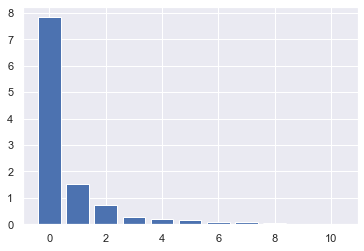

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

sorting = np.argsort(-eigenval)

eigenval = eigenval[sorting]
print(eigenval)
eigenvec = eigenvec[:,sorting]

plt.figure()

plt.bar(np.arange(len(eigenval)), eigenval)
plt.show()


How many principal components should you include based on the spectrum plot?

One method to decide about the number of components is the "explained variance." The amount of data variance captured by each principal components is the magnitude of its corresponding eigenvalue. Therefore, in the explained variance method, we calculate the proportion of each the eigenvalue respective to the total sum of the eigenvalues. That gives us the percentage of data variance explained by each corresponding principal component. And the cumulative sum of these percentages shows how much more of the dataset information (variance) is presentable with taking one more component. Knowing that on one hand, and the computational cost and the difficulty of visualization of one more dimension gives a clue for the decision.

Execute the cells below and decide about an efficient number of principal components.

In [9]:
print(X)

    Suggested retail price (USD)  Price to dealer (USD)  Engine size (liters)  \
0                       0.186401               0.158792              0.342282   
1                      -0.319018              -0.327172             -0.725598   
2                      -0.072782              -0.092355             -0.143118   
3                       0.485692               0.466532             -0.434358   
4                       0.833469               0.807434              1.021842   
..                           ...                    ...                   ...   
92                     -0.473106              -0.480902             -1.308078   
93                      0.113799               0.097613              0.051042   
94                     -0.077605              -0.032518             -0.628518   
95                      0.226256               0.282101             -0.240198   
96                      0.404968               0.467147             -0.240198   

    Number of engine cylind

In [10]:
print(covar)

[[ 1.          0.99922003  0.69415581  0.77915914  0.88716466 -0.61194724
  -0.5531398   0.59556447  0.37846106  0.37254183  0.43618375]
 [ 0.99922003  1.          0.6863659   0.77621632  0.88296077 -0.60683858
  -0.54820187  0.58895087  0.37493607  0.36727937  0.42896429]
 [ 0.69415581  0.6863659   1.          0.91060672  0.8136671  -0.80919983
  -0.75166428  0.8367118   0.69205188  0.70017159  0.78241519]
 [ 0.77915914  0.77621632  0.91060672  1.          0.83654575 -0.74543166
  -0.6796635   0.72590862  0.57858424  0.5799605   0.65918238]
 [ 0.88716466  0.88296077  0.8136671   0.83654575  1.         -0.76710412
  -0.70656028  0.69513207  0.48388319  0.50700148  0.60885979]
 [-0.61194724 -0.60683858 -0.80919983 -0.74543166 -0.76710412  1.
   0.94785015 -0.8399098  -0.60995989 -0.59498012 -0.7272361 ]
 [-0.5531398  -0.54820187 -0.75166428 -0.6796635  -0.70656028  0.94785015
   1.         -0.84828854 -0.51654229 -0.45790229 -0.67878859]
 [ 0.59556447  0.58895087  0.8367118   0.72590862

In [11]:
var_exp = eigenval/eigenval.sum() * 100

In [12]:
var_exp

array([7.12150197e+01, 1.37259705e+01, 6.68838845e+00, 2.56604773e+00,
       1.93649070e+00, 1.64758972e+00, 8.06122439e-01, 7.30219299e-01,
       4.21515538e-01, 2.56554767e-01, 6.08107232e-03])

In [13]:
# What to use for cars_norm????
# X doesnt work


In [14]:
cars_norm = X

In [15]:
cars_norm

,Suggested retail price (USD),Price to dealer (USD),Engine size (liters),Number of engine cylinders,Engine horsepower,City gas mileage,Highway gas mileage,Weight (pounds),Wheelbase (inches),Length (inches),Width (inches)
0,0.186401,0.158792,0.342282,0.095696,0.663306,-0.668751,-0.754652,1.113018,-0.205528,0.258083,1.554017
1,-0.319018,-0.327172,-0.725598,-1.141975,-0.198281,0.401692,0.343367,-0.479176,-0.346919,-0.186308,-0.708492
2,-0.072782,-0.092355,-0.143118,0.095696,0.066823,-0.026485,0.160364,-0.176646,-0.488310,-0.482569,-0.425678
3,0.485692,0.466532,-0.434358,0.095696,0.464478,-0.454663,-0.388646,0.311053,0.218646,0.480278,-0.142865
4,0.833469,0.807434,1.021842,1.333368,1.127238,-0.668751,-0.571649,0.556207,0.218646,0.554343,-0.142865
...,...,...,...,...,...,...,...,...,...,...,...
92,-0.473106,-0.480902,-1.308078,-1.141975,-0.595937,0.401692,0.709373,-0.464832,-0.205528,-0.038178,-0.708492
93,0.113799,0.097613,0.051042,0.095696,0.066823,-1.096929,-1.303661,1.941064,0.642820,0.109952,1.271203
94,-0.077605,-0.032518,-0.628518,-0.523140,-0.092240,-0.026485,-0.022640,0.398422,-0.064136,-0.408504,-0.142865
95,0.226256,0.282101,-0.240198,0.095696,-0.092240,-0.026485,0.160364,-0.027989,0.360038,0.332148,0.139949


In [16]:
#(cars_norm @ eigenvec[:,:2])[0]

In [17]:
eigenvec

array([[-2.81968433e-01,  4.52857443e-01,  2.29468541e-01,
         2.77987878e-01, -7.46123227e-02,  3.64332381e-02,
        -1.81328792e-01, -1.21433292e-01, -1.51984204e-01,
        -4.03677912e-02,  7.11499512e-01],
       [-2.80101879e-01,  4.56750020e-01,  2.32860468e-01,
         2.86061644e-01, -6.85682674e-02,  4.68829948e-02,
        -1.77503285e-01, -1.56385254e-01, -1.34859073e-01,
        -5.46919602e-02, -7.02015333e-01],
       [-3.35787869e-01, -2.38114206e-02,  3.40418775e-02,
        -5.16287029e-01, -6.15648770e-02,  1.27687212e-01,
        -1.27675952e-01,  4.73324806e-01, -5.97245433e-01,
        -3.69820547e-02, -2.16059939e-02],
       [-3.20270774e-01,  1.48515587e-01,  1.13201901e-01,
        -6.47132009e-01,  1.03297885e-02,  2.48005915e-01,
         5.34346779e-02, -4.38798912e-01,  4.31865960e-01,
         6.35949315e-03,  1.46015341e-02],
       [-3.16779137e-01,  2.89419298e-01,  5.58102593e-02,
         1.19928753e-02,  1.46139404e-01, -4.11752866e-01,
  

As you can see, with the first eigenvalue/component we can describe about 70% of the variance in our dataset; taking the first two will increase it to more than 80%. For the sake of a convinient visualization we will go with the first two components, because the increase of the variation is not that much after the second component.

Now you should have a matrix full of eigenvectors. We can now do two things: project the data down onto the two dimensional subspace to visualize it and we can also plot the two first principle component vectors as eleven two dimensional points to get a feeling for how the features are projected into the subspace. Execute the two cells below and describe what you see. Is PCA a good method for this problem? Was it justifiable that we only considered the first two principle components? What kinds of cars are in the four quadrants of the second plot? (**put your answer in the cell below of this code cell**)

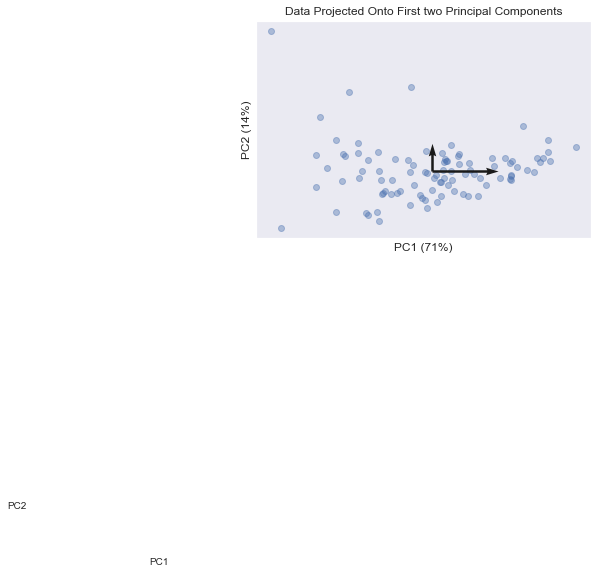

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt


# Project the data down into the two dimensional subspace
proj = cars_norm @ eigenvec[:,:2]

# Plot projected data
plt.title('Data Projected Onto First two Principal Components')
plt.xticks([])
plt.yticks([])
plt.xlabel('PC1 ({}%)'.format(round(var_exp[0])))
plt.ylabel('PC2 ({}%)'.format(round(var_exp[1])))
plt.scatter(proj[0], proj[1], alpha=.4) # I changed this line

# Plot the PC Vectors
# Project them and scale them by the standard deviation.
eigenvec_p = eigenvec.T @ eigenvec * np.sqrt(eigenval)
origin = np.mean(proj, axis=0)

plt.quiver(*origin, eigenvec_p[0,0], eigenvec_p[0,1], angles='xy', scale_units='xy', scale=1)
plt.quiver(*origin, eigenvec_p[1,0], eigenvec_p[1,1], angles='xy', scale_units='xy', scale=1)


plt.text(-12,-17.5, 'PC1')
plt.text(-18,-15, 'PC2');

KeyError: (slice(None, None, None), 0)

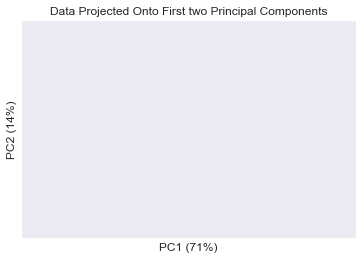

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

# Project the data down into the two dimensional subspace
proj = cars_norm @ eigenvec[:,:2]


# Plot projected data
plt.title('Data Projected Onto First two Principal Components')
plt.xticks([])
plt.yticks([])
plt.xlabel('PC1 ({}%)'.format(round(var_exp[0])))
plt.ylabel('PC2 ({}%)'.format(round(var_exp[1])))
plt.scatter(proj[:,0], proj[:,1], alpha=.4)

# Plot the PC Vectors
# Project them and scale them by the standard deviation.
eigenvec_p = eigenvec.T @ eigenvec * np.sqrt(eigenval)
origin = np.mean(proj, axis=0)

plt.quiver(*origin, eigenvec_p[0,0], eigenvec_p[0,1], angles='xy', scale_units='xy', scale=1)
plt.quiver(*origin, eigenvec_p[1,0], eigenvec_p[1,1], angles='xy', scale_units='xy', scale=1)


plt.text(-12,-17.5, 'PC1')
plt.text(-18,-15, 'PC2');

In [ ]:
# Set the plot

plt.figure(figsize=(10,8))

plt.title('Eigenvectors Plot')
plt.axhline(0, color='green', linestyle=':')
plt.axvline(0, color='green', linestyle=':')
plt.xticks([])
plt.yticks([])
plt.xlabel('PC1 ({}%)'.format(round(var_exp[0])))
plt.ylabel('PC2 ({}%)'.format(round(var_exp[1])))


# plot centered projected data
proj = proj - np.mean(proj, axis=0)


plt.scatter(proj[0], proj[1], alpha=.4) # changed this line

# scale eigenvectors
eigenvec_s = eigenvec * np.sqrt(eigenval)

# Plot the eigenvector and add the labels
for idx, eivec in enumerate(eigenvec_s[:,:2]):
    plt.arrow(0, 0, eivec[0]*5, eivec[1]*5, alpha=.8, 
              color=plt.get_cmap('Set3')(idx), 
              width=0.03, head_width=.2, label=cols[idx])   

plt.legend()

plt.show()

In [ ]:
# Set the plot

plt.figure(figsize=(10,8))

plt.title('Eigenvectors Plot')
plt.axhline(0, color='green', linestyle=':')
plt.axvline(0, color='green', linestyle=':')
plt.xticks([])
plt.yticks([])
plt.xlabel('PC1 ({}%)'.format(round(var_exp[0])))
plt.ylabel('PC2 ({}%)'.format(round(var_exp[1])))


# plot centered projected data
proj = proj - np.mean(proj, axis=0)


plt.scatter(proj[:,0], proj[:,1], alpha=.4)

# scale eigenvectors
eigenvec_s = eigenvec * np.sqrt(eigenval)

# Plot the eigenvector and add the labels
for idx, eivec in enumerate(eigenvec_s[:,:2]):
    plt.arrow(0, 0, eivec[0]*5, eivec[1]*5, alpha=.8, 
              color=plt.get_cmap('Set3')(idx), 
              width=0.03, head_width=.2, label=cols[idx])   

plt.legend()

plt.show()

 Is PCA a good method for this problem? Was it justifiable that we only considered the first two principle components? What kinds of cars are in the four quadrants of the second plot?
 

PCA is a good method for this problem, because we see no clusters and no correlation, this is what we want.

For visualisation purpose it is really good to have two exes, one would be to less and three would maybe be too much. But the most of the variance is in the first eigenvector.

* Top left:  Expensive and average size 
* Bottom left: big and average price
* Top right:  high gas mileages and average price
* Bottom right:  low price and high gas mileages, maybe old cars

## Assignment 3: PCA [3 Points]

In this exercise we investigate the statement from the lecture that PCA finds the subspace that captures most of the data variance. To be more precise, we show that the orthonormal projection onto an $m$-dimensional subspace that maximizes the variance of the projected data is defined by the principal components, i.e. by the $m$ eigenvectors of the correlation matrix $C$ corresponding to the $m$ largest eigenvalues. The proof consists of two steps. In this exercise you will only proof the first step:

### First step:
Consider a one dimensional subspace: Determine a (unit) vector $\vec{p}$, such that the variance of the data, when projected onto the subspace determined by that vector, is maximal.

The correlation matrix $C$ allows to compute the variance of the projected data as $\vec{p}^{T}C\vec{p}$. We want to maximize this expression. To avoid $\|\vec{p}\|\to\infty$ we will only consider unit vectors, i.e. we constrain $\vec{p}$ to be normalized: $\vec{p}^T\vec{p}=1$. Maximize the expression with this constraint (which can be done using a Lagrangian multiplier). Conclude that a suitable $\vec{p}$ has to be an eigenvector of $C$ and describe which of the eigenvectors is optimal.

YOUR ANSWER HERE

### Second step:
(Outline for the interested reader. You do not have to solve this second part.)

In the second step the statement for the general case of an $m$-dimensional projection space is proofed by induction:

Assume the statement has been shown for the $(m-1)$-dimensional projection space, spanned by the $m-1$ (orthonormal) eigenvectors $\vec{p}_1,\ldots,\vec{p}_{m-1}$ corresponding to the $(m-1)$ largest eigenvalues $\lambda_1,\ldots,\lambda_{m-1}$. Now find a (unit) vector $\vec{p}_m$, orthogonal to the existing vectors $\vec{p}_1,\ldots,\vec{p}_{m-1}$, that maximizes the projected variance $\vec{p}_m^TC\vec{p}_m$. Proceed similar to the first step, but with additional Lagrangian multipliers to enforce the orthogonality constraint. One can then show that the new vector $\vec{p}_m$ is an eigenvector of $C$. Finally it can be shown that the variance is maximized for the eigenvector corresponding to the $m$-th largest eigenvalue $\lambda_m$.

In [ ]:
# YOUR CODE HERE